# Introduction
I think most of us have heard the sinking of Titanic because of collided with iceberg in 1912.It was the notorious thing for that time.Died 1502 out of 2224 passengers and crew.The sinking ship investigated for many years and Films, Documentaries were made about it.

<font color = 'blue'>
Content:

1. [Load And Check Data](#1)
2. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation](#12)
    * [SibSp <> Survived](#13)
    * [Parch <> Survived](#14)
    * [Pclass <> Survived](#15)
    * [Age <> Survived](#16)
    * [Pclass <> Survived <> Age](#17)
    * [Embarked <> Sex <> Pclass <> Survived](#18)
    * [Embarked <> Sex <> Fare <> Survived](#19)
    * [Fill Missing Age Value](#20)
1. [Feature Engineering](#21)
    * [Name <> Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Unnecessary Columns for Model Train](#28)
1. [Modelling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning - Grid Search - CV](#32)
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


<a id = "1"></a>
### Load And Check Data

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_PassengerId = test_data['PassengerId']

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
# Variable Description
1. PassengerId: Identification number to each passanger
1. Survived: Passenger survival situation (1 > Live , 0 > Dead)
1. Pclass: Passenger class
1. Name: Passenger name
1. Sex: Gender of passenger
1. Age: Age of passenger
1. SibSp: Number of siblings / spouses
1. Parch: Number of parent / children
1. Ticket: Ticked Number
1. Fare: Amount of money to spent on ticket
1. Cabin: Cabin Category
1. Embarked: Ports where passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)

<a id = "3"></a>
# Univariate Variable Analysis
* Categorical Variable: Survived, Pclass, Sex, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: PassengerID, Age, Fare

<a id = "4"></a>
## Categorical Variable

In [6]:
def bar_plot(variable):
    """
    input : variable, example : 'Sex'
    output : bar plot & value count
    """
    # feature
    var = train_data[variable]
    # number of categorical variable
    varValue = var.value_counts()
    
    # visualization
    plt.figure(figsize = (10,4))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n{}'.format(variable, varValue))

In [7]:
train_data['Survived'].value_counts().index.values

array([0, 1])

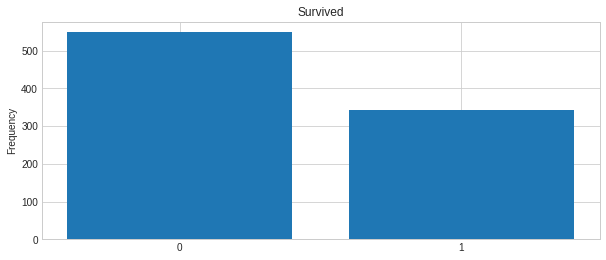

Survived: 
0    549
1    342
Name: Survived, dtype: int64


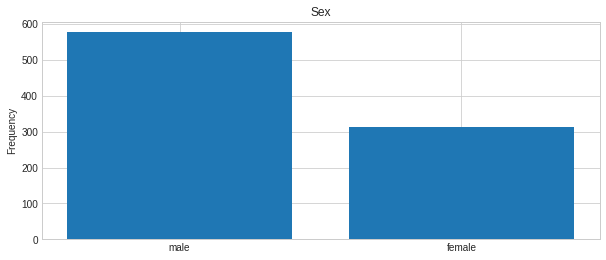

Sex: 
male      577
female    314
Name: Sex, dtype: int64


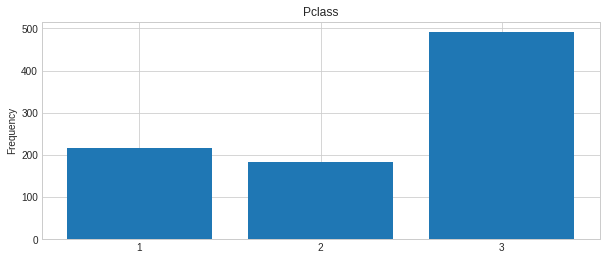

Pclass: 
3    491
1    216
2    184
Name: Pclass, dtype: int64


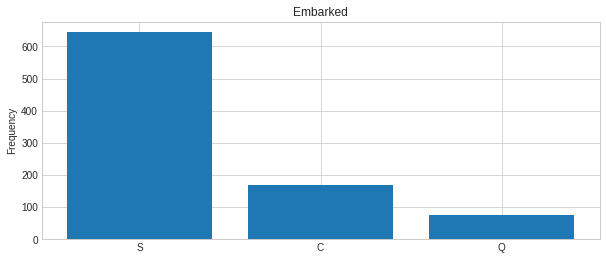

Embarked: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


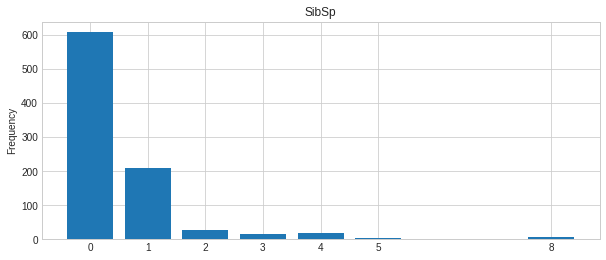

SibSp: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


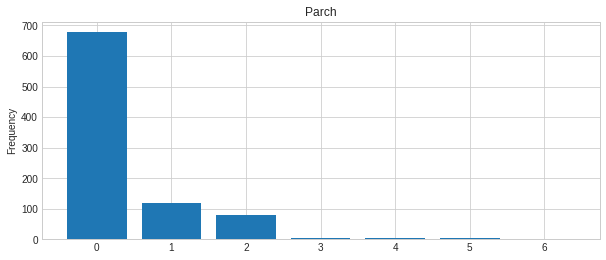

Parch: 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1 = ['Survived','Sex','Pclass','Embarked','SibSp','Parch']
for each in category1:
    bar_plot(each)

In [9]:
category2 = ['Cabin','Name','Ticket']
for each in category2:
    print('{}\n'.format(train_data[each].value_counts()))

G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
              ..
B94            1
A34            1
B19            1
B101           1
B102           1
Name: Cabin, Length: 147, dtype: int64

Colley, Mr. Edward Pomeroy                    1
Wick, Miss. Mary Natalie                      1
Ibrahim Shawah, Mr. Yousseff                  1
Wells, Miss. Joan                             1
Connolly, Miss. Kate                          1
                                             ..
Goodwin, Mr. Charles Edward                   1
Attalah, Miss. Malake                         1
Nicola-Yarred, Miss. Jamila                   1
Sedgwick, Mr. Charles Frederick Waddington    1
Hirvonen, Miss. Hildur E                      1
Name: Name, Length: 891, dtype: int64

1601          7
CA. 2343      7
347082        7
3101295       6
347088        6
             ..
350042        1
13214         1
A.5. 18509    1
111320        1
240929        1
Name: Ticket, Length: 681, dty

<a id = "5"></a>
## Numerical Variable

In [10]:
def hist_plot(variable):
    plt.figure(figsize = (10,4))
    plt.hist(train_data[variable], bins = 55)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('{} distribution with histogram'.format(variable))
    plt.show()

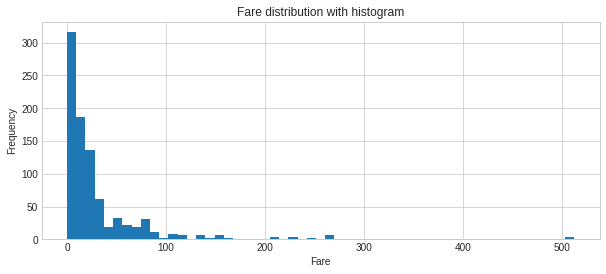

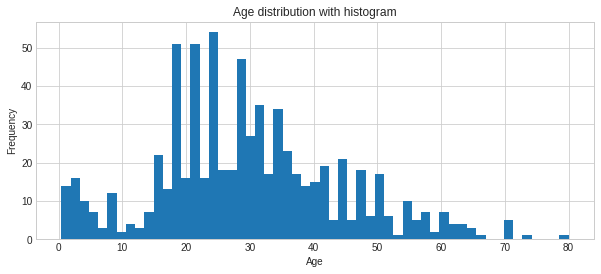

In [11]:
numericVar = ['Fare','Age']
for each in numericVar:
    hist_plot(each)

<a id = "6"></a>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [12]:
# Pclass vs Survived
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# Sex vs Survived
train_data[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# SibSp vs Survived
train_data[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
# Parch vs Survived
train_data[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "7"></a>
# Outlier Detection

In [16]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25) # 1st quartile
        Q3 = np.percentile(df[c],75) # 3rd quartile
        IQR = Q3 - Q1 # IQR
        outlier_step = IQR * 1.5 # Outlier step
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index # detect outlier
        outlier_indices.extend(outlier_list_col) # stack indeces
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [17]:
train_data.loc[detect_outliers(train_data,['Age','SibSp','Parch','Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
# Drop outliers
train_data = train_data.drop(detect_outliers(train_data,['Age','SibSp','Parch','Fare']), axis = 0).reset_index(drop = True)

<a id = "8"></a>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [19]:
train_data_len = len(train_data)
train_data = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)

<a id = "9"></a>
## Find Missing Value

In [20]:
train_data.columns[train_data.isnull().any()]

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [21]:
train_data.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

<a id = "10"></a>
## Fill Missing Value
* in Embarked, 2 missing value
* in Fare, only one missing value

In [22]:
train_data[train_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
60,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


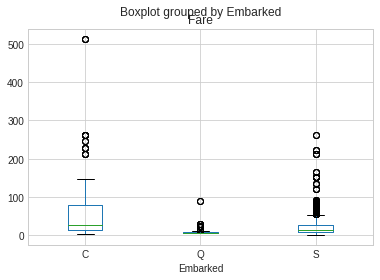

In [23]:
train_data.boxplot(column='Fare', by ='Embarked')
plt.show()

In [24]:
train_data['Embarked'] = train_data['Embarked'].fillna('C')
train_data[train_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [25]:
train_data[train_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [26]:
train_data['Fare'] = train_data['Fare'].fillna(np.mean(train_data[train_data['Pclass'] == 3]['Fare']))
train_data[train_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


<a id = "11"></a>
# Visualization

<a id = "12"></a>
## Correlation

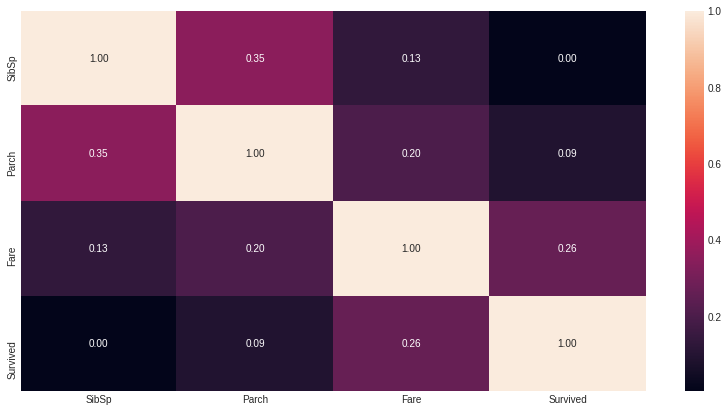

In [27]:
corr1= ['SibSp', 'Parch', 'Fare', 'Survived',]
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train_data[corr1].corr(), annot = True, fmt = '.2f')
plt.show()
# As we can see, who passengers are paid much money to ticket, their survive rate higher than others

<a id = "13"></a>
## SibSp <> Survived

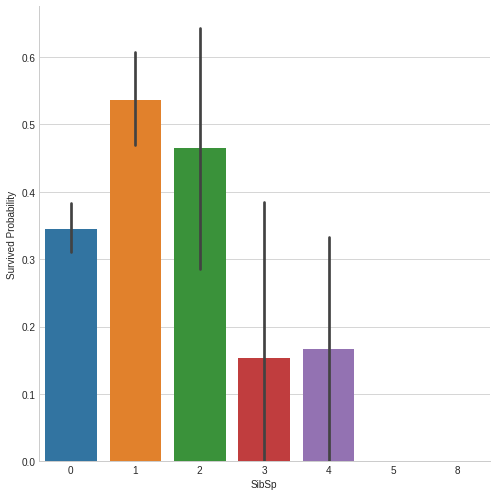

In [28]:
g = sns.factorplot(x = 'SibSp', y = 'Survived', data = train_data, kind = 'bar', size = 7)
g.set_ylabels('Survived Probability')
plt.show()
# Who passengers have much than 2 siblings, their survive rate seems low
# we can make new features for describing these categories

<a id = "14"></a>
## Parch <> Survived

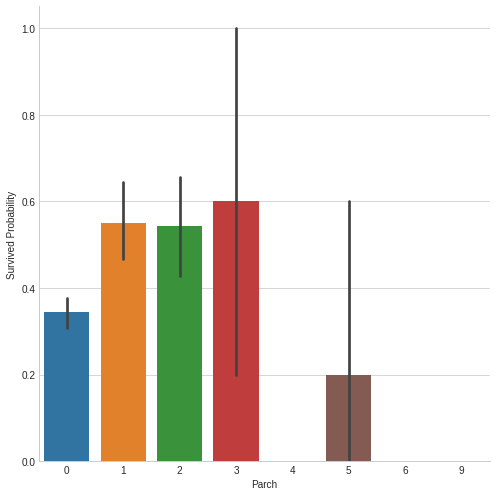

In [29]:
g = sns.factorplot(x = 'Parch', y = 'Survived', data = train_data, kind = 'bar', size = 7)
g.set_ylabels('Survived Probability')
plt.show()
# Passengers watching alone, seem to have low survival rates
# Passengers with more than 3 siblings, seem to have low survival rates
# we can make new features for describing these categories
# we can concat Siblings and Parch

<a id = "15"></a>
## Pclass <> Survived

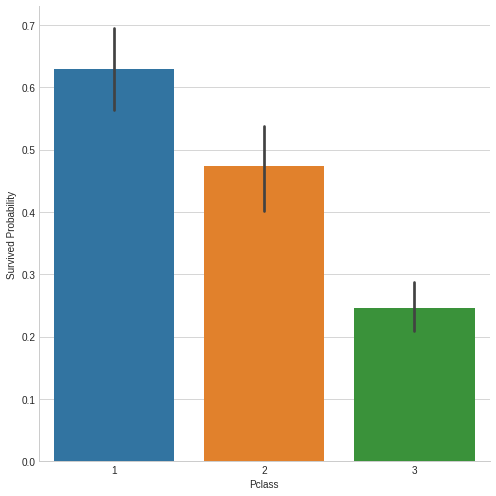

In [30]:
g = sns.factorplot(x = 'Pclass', y = 'Survived', data = train_data, kind = 'bar', size = 7)
g.set_ylabels('Survived Probability')
plt.show()
# passengers watching in high class, survival rates seem high

<a id = "16"></a>
## Age <> Survived

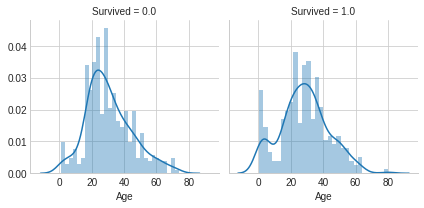

In [31]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot, 'Age' ,bins=30)
plt.show()
# The graph clearly shows that babies and older people have high survival rates
# passengers over 20 years, couldn't survive
# Passenger distribution is largely between the ages of 15-20
# we could use age feature in train
# we could use age distribution for missing value of age

<a id = "17"></a>
## Pclass <> Survived <> Age

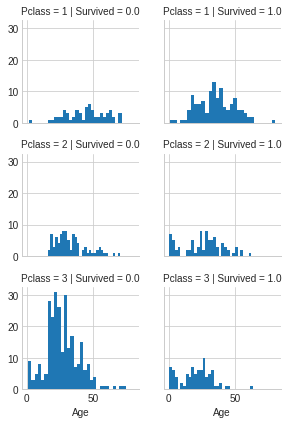

In [32]:
g = sns.FacetGrid(train_data, col='Survived', row='Pclass', size = 2)
g.map(plt.hist, 'Age' ,bins=30)
g.add_legend()
plt.show()
# pclass is important feature to model training

<a id = "18"></a>
## Embarked <> Sex <> Pclass <> Survived

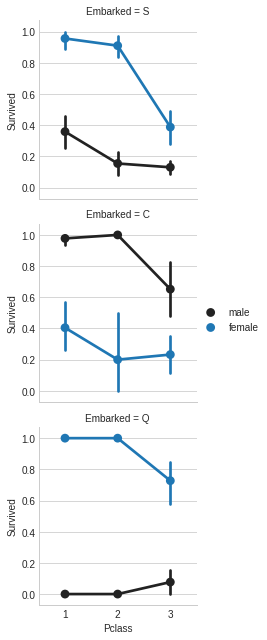

In [33]:
g = sns.FacetGrid(train_data, row='Embarked', size = 3)
g.map(sns.pointplot, 'Pclass','Survived','Sex' ,bins=30)
g.add_legend()
plt.show()
# women survival rate is higher than men
# Male passengers departing from part c have high survival rate
# we could use embarked and sex features in training

<a id = "19"></a>
## Embarked <> Sex <> Fare <> Survived

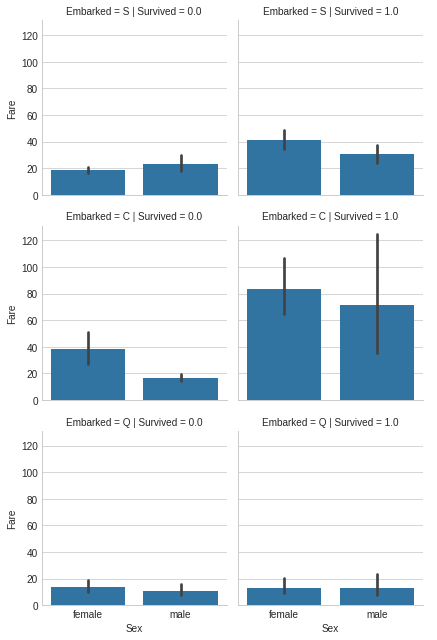

In [34]:
g = sns.FacetGrid(train_data, col='Survived', row='Embarked', size = 3)
g.map(sns.barplot, 'Sex','Fare')
g.add_legend()
plt.show()
# passengers who paid more for ticket have higher survival rates
# we could use fare feature as categorical for training

<a id = "20"></a>
## Fill Missing Age Value

In [35]:
train_data[train_data['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
27,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
1291,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
1294,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1297,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


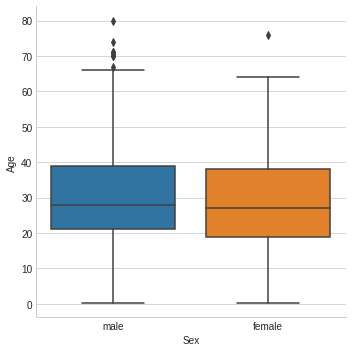

In [36]:
sns.factorplot(x='Sex', y='Age', data = train_data, kind='box')
plt.show()
# it seems clearly Sex feature is not informative for fill to Age's missing values, because of age distribution looks same

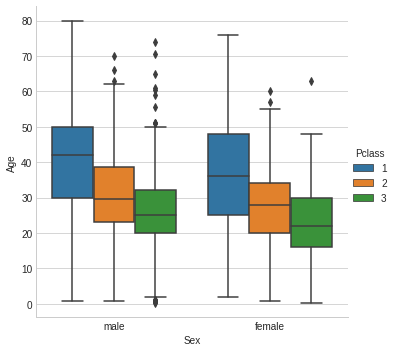

In [37]:
sns.factorplot(x='Sex', y='Age', hue='Pclass', data = train_data, kind='box')
plt.show()
# As average, 1st class passengers are elder than 2nd class, and second class passengers are elder than 3rd class passengers.

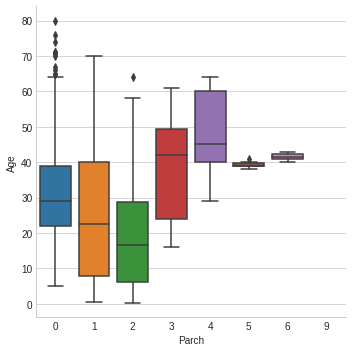

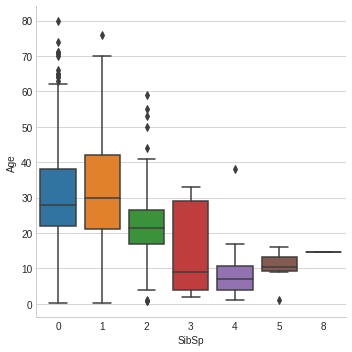

In [38]:
sns.factorplot(x='Parch', y='Age', data = train_data, kind='box')
sns.factorplot(x='SibSp', y='Age', data = train_data, kind='box')
plt.show()

In [39]:
train_data['Sex'] = [1 if each == 'male' else 0 for each in train_data['Sex']]

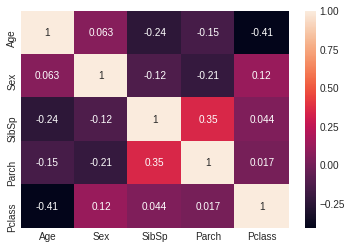

In [40]:
sns.heatmap(train_data[['Age','Sex','SibSp','Parch','Pclass',]].corr(), annot=True)
plt.show()
# Age is not correlation in with Sex, but this is correlation in with Parch,SibSp, Pclass

In [41]:
index_nan_age = list(train_data['Age'][train_data['Age'].isnull()].index)
for each in index_nan_age:
    age_pred = train_data['Age'][((train_data['SibSp'] == train_data.iloc[each]['SibSp']) & (train_data['Parch'] == train_data.iloc[each]['Parch']) & (train_data['Pclass'] == train_data.iloc[each]['Pclass']))].median()
    age_med = train_data['Age'].median()
    if not np.isnan(age_pred):
        train_data['Age'].iloc[each] = age_pred
    else:
        train_data['Age'].iloc[each] = age_med

In [42]:
train_data[train_data['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


<a id = "21"></a>
# Feature Engineering

 <a id = "22"></a>
 ## Name <> Title

In [43]:
train_data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [44]:
name = train_data['Name']
train_data['Title'] = [each.split('.')[0].split(',')[-1].strip() for each in name]

In [45]:
train_data.Title.head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

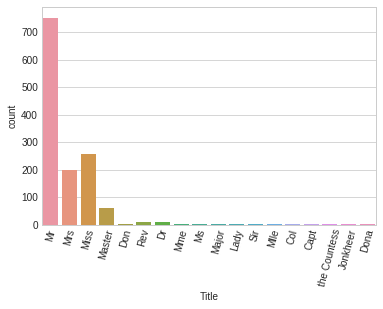

In [46]:
sns.countplot(x='Title', data= train_data)
plt.xticks(rotation = 75)
plt.show()

In [47]:
# convert to categorical
train_data['Title'] = train_data['Title'].replace(['Don','Rev','Dr','Dona','Capt','the Countess','Jonkheer','Col','Sir','Lady','Major',],'Other')
train_data['Title'] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_data["Title"]]
train_data["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

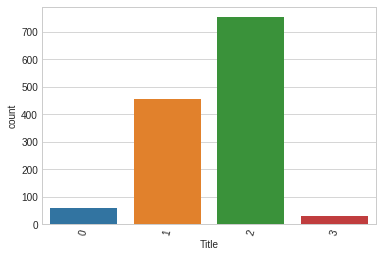

In [48]:
sns.countplot(x='Title', data= train_data)
plt.xticks(rotation = 75)
plt.show()

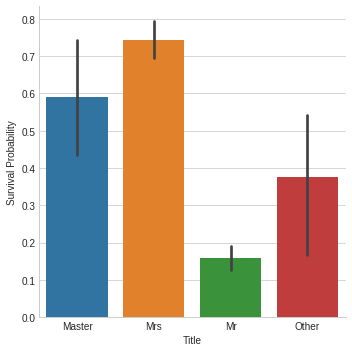

In [49]:
g = sns.factorplot(x='Title', y='Survived', data=train_data, kind = 'bar')
g.set_xticklabels(['Master','Mrs','Mr','Other'])
g.set_ylabels("Survival Probability")
plt.show()

In [50]:
train_data.drop(labels = ['Name'], axis = 1, inplace = True)

In [51]:
train_data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,1
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,2


In [52]:
train_data = pd.get_dummies(train_data, columns=['Title'])
train_data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0


<a id = "23"></a>
## Family <> Size

In [53]:
train_data['FSize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [54]:
train_data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,FSize
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1


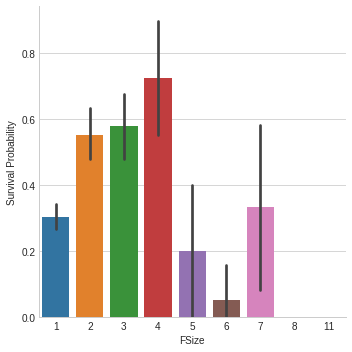

In [55]:
g = sns.factorplot(x='FSize', y='Survived', data=train_data, kind='bar')
g.set_ylabels("Survival Probability")
plt.show()

In [56]:
train_data['family_size'] = [1 if i < 4.5 else 0 for i in train_data['FSize']]

In [57]:
train_data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,FSize,family_size
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,1
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,1
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,1
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,1


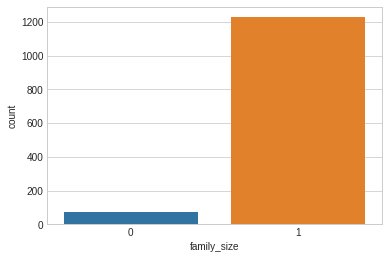

In [58]:
sns.countplot(x='family_size', data=train_data)
plt.show()

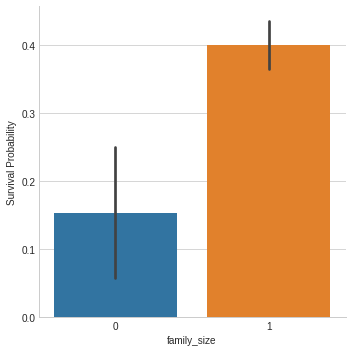

In [59]:
g = sns.factorplot(x='family_size', y='Survived', data=train_data, kind='bar')
g.set_ylabels("Survival Probability")
plt.show()
# people whose family members are more than 4 , their survival rate is lower
# small families survival rate is higher

In [60]:
train_data = pd.get_dummies(train_data, columns=['family_size'])
train_data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,family_size_1
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,0,1
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,0,1
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,0,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,0,1
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,0,1


<a id = "24"></a>
## Embarked

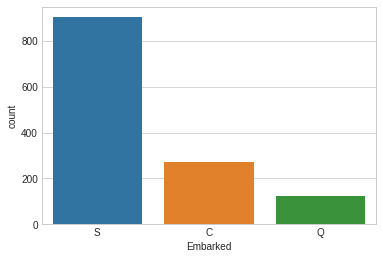

In [61]:
sns.countplot(train_data['Embarked'])
plt.show()

In [62]:
train_data = pd.get_dummies(train_data, columns=['Embarked'])
train_data.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,0,1,0,0,1
1,38.0,C85,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,0,1,1,0,0
2,26.0,NaN,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,0,1,0,0,1
3,35.0,C123,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,0,1,0,0,1
4,35.0,NaN,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,0,1,0,0,1


<a id = "25"></a>
## Ticket

In [63]:
tickets = []
for each in list(train_data['Ticket']):
    if not each.isdigit():
        tickets.append(each.replace('.','').replace('/','').strip().split(' ')[0])
    else:
        tickets.append('x')
train_data['Ticket'] = tickets

In [64]:
train_data = pd.get_dummies(train_data, columns=['Ticket'], prefix = 'T')
train_data.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,22.0,NaN,7.2500,0,1,3,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,C85,71.2833,0,2,1,0,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,NaN,7.9250,0,3,3,0,0,1.0,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,C123,53.1000,0,4,1,0,1,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,8.0500,0,5,3,1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


<a id = "26"></a>
## Pclass

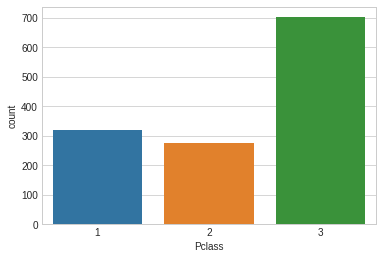

In [65]:
sns.countplot(train_data['Pclass'])
plt.show()

In [66]:
train_data['Pclass'] = train_data['Pclass'].astype('category')
train_data = pd.get_dummies(train_data, columns=['Pclass'])
train_data.head()

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,7.2500,0,1,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,71.2833,0,2,0,1,1.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,NaN,7.9250,0,3,0,0,1.0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,35.0,C123,53.1000,0,4,0,1,1.0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,NaN,8.0500,0,5,1,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id = "27"></a>
## Sex

In [67]:
train_data['Sex'] = train_data['Sex'].astype('category')
train_data = pd.get_dummies(train_data, columns=['Sex'])
train_data.head()

,Age,Cabin,Fare,Parch,PassengerId,SibSp,Survived,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,22.0,NaN,7.2500,0,1,1,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,38.0,C85,71.2833,0,2,1,1.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,26.0,NaN,7.9250,0,3,0,1.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,35.0,C123,53.1000,0,4,1,1.0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,35.0,NaN,8.0500,0,5,0,0.0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "28"></a>
## Drop Unnecessary Columns for Model Train

In [68]:
train_data.drop(labels=['PassengerId','Cabin'], axis=1, inplace=True)

In [69]:
train_data.head()

,Age,Fare,Parch,SibSp,Survived,Title_0,Title_1,Title_2,Title_3,FSize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,22.0,7.2500,0,1,0.0,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,38.0,71.2833,0,1,1.0,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,26.0,7.9250,0,0,1.0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,35.0,53.1000,0,1,1.0,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,35.0,8.0500,0,0,0.0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "29"></a>
# Modelling

<a id = "30"></a>
## Train - Test Split

In [70]:
test = train_data[train_data_len:]
test.drop(labels = ['Survived'], axis=1, inplace=True)

In [71]:
train = train_data[:train_data_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


<a id = "31"></a>
## Simple Logistic Regression

In [72]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_accuracy = round(lr.score(X_train, y_train) * 100,2)
lr_test_accuracy = round(lr.score(X_test, y_test) * 100,2)
print('Train Acc : {}'.format(lr_train_accuracy))
print('Test Acc : {}'.format(lr_test_accuracy))

Train Acc : 83.22
Test Acc : 81.79


<a id = "32"></a>
## Hyperparameter Tuning - Grid Search - CV
* We'll look to best model for best accuracy

In [73]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state=random_state),
              SVC(random_state=random_state),
              RandomForestClassifier(random_state=random_state),
              LogisticRegression(random_state=random_state),
              KNeighborsClassifier()]
dt_param_grid = {'min_samples_split' : range(10,500,20),
                 'max_depth': range(1,20,2)}

svc_param_grid = {'kernel' : ['rbf'],
                  'gamma': [0.001, 0.01, 0.1, 1],
                  'C': [1,10,50,100,200,300,100]}

rf_param_grid = {'max_features': [1,3,10],
                 'min_samples_split': [2,3,10],
                 'min_samples_leaf':[1,3,10],
                 'bootstrap':[False],
                 'n_estimators':[100,300],
                 'criterion':['gini']}

lr_param_grid = {'C': np.logspace(-3,3,7),
                 'penalty': ['l1','l2']}

knn_param_grid = {'n_neighbors': np.linspace(1,19,10, dtype=int).tolist(),
                  'weights': ['uniform','distance'],
                  'metric': ['euclidean','manhattan']}

classifier_param = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    lr_param_grid,
                    knn_param_grid]

In [74]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8372881355932204
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7949152542372881
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.4min finished


0.8423728813559322
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.823728813559322
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s


0.7830508474576271


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.7s finished


Text(0.5, 1.0, 'Cross Validation Scores')

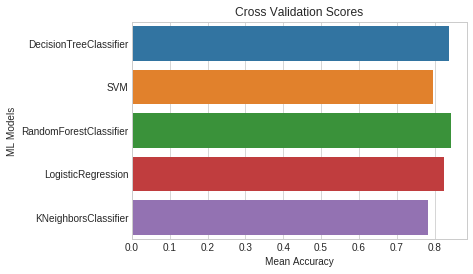

In [75]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id = "33"></a>
## Ensemble Modeling

In [76]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8144329896907216


<a id = "34"></a>
## Prediction and Submission

In [77]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)